In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("bhanupratapbiswas/inventory-analysis-case-study")

print("Path to dataset files:", path)

Path to dataset files: /home/codespace/.cache/kagglehub/datasets/bhanupratapbiswas/inventory-analysis-case-study/versions/1


In [3]:
os.chdir('/home/codespace/.cache/kagglehub/datasets/bhanupratapbiswas/inventory-analysis-case-study/versions/1')

In [4]:
#Cargar datasets
beg_inv = pd.read_csv('BegInvFINAL12312016.csv')
end_inv = pd.read_csv('EndInvFINAL12312016.csv')
sales = pd.read_csv('SalesFINAL12312016.csv')
purchases = pd.read_csv('PurchasesFINAL12312016.csv')
invoice_purchases = pd.read_csv('InvoicePurchases12312016.csv')
purchase_prices = pd.read_csv('2017PurchasePricesDec.csv')

In [5]:
# Ver las dimensiones del dataset

print("Dimensiones de cada archivo:")
print("Inventario Inicial:", beg_inv.shape)
print("Inventario Final:", end_inv.shape)
print("Compras:", purchases.shape)
print("Facturas de Compras:", invoice_purchases.shape)
print("Precios de compras:", invoice_purchases.shape)
print("Ventas:", sales.shape)

Dimensiones de cada archivo:
Inventario Inicial: (206529, 9)
Inventario Final: (224489, 9)
Compras: (2372474, 16)
Facturas de Compras: (5543, 10)
Precios de compras: (5543, 10)
Ventas: (1048575, 14)


In [6]:
print("purchase_prices Columns:")
print(purchase_prices.columns.tolist())

print("\nbeg_inv Columns:")
print(beg_inv.columns.tolist())

print("\nend_inv Columns:")
print(end_inv.columns.tolist())

print("\ninvoice_purchases Columns:")
print(invoice_purchases.columns.tolist())

print("\npurchases Columns:")
print(purchases.columns.tolist())

print("\nsales Columns:")
print(sales.columns.tolist())

purchase_prices Columns:
['Brand', 'Description', 'Price', 'Size', 'Volume', 'Classification', 'PurchasePrice', 'VendorNumber', 'VendorName']

beg_inv Columns:
['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size', 'onHand', 'Price', 'startDate']

end_inv Columns:
['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size', 'onHand', 'Price', 'endDate']

invoice_purchases Columns:
['VendorNumber', 'VendorName', 'InvoiceDate', 'PONumber', 'PODate', 'PayDate', 'Quantity', 'Dollars', 'Freight', 'Approval']

purchases Columns:
['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'VendorNumber', 'VendorName', 'PONumber', 'PODate', 'ReceivingDate', 'InvoiceDate', 'PayDate', 'PurchasePrice', 'Quantity', 'Dollars', 'Classification']

sales Columns:
['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'SalesQuantity', 'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume', 'Classification', 'ExciseTax', 'VendorNo', 'VendorName']


In [7]:
# Realizar copia del dataset
beg_inv_f = beg_inv.copy() 
end_inv_f = end_inv.copy()
purchases_f = purchases.copy()
invoice_purchases_f= invoice_purchases.copy()
purchase_prices_f = purchase_prices.copy()
sales_f = sales.copy()

In [8]:
# Rellenar datos faltantes en la columna "City" del inventario final
end_inv_f["City"] = end_inv_f["City"].fillna("TYWARDREATH")

# Eliminar filas con valores faltantes en "Size" en la tabla compras
purchases_f.dropna(subset=["Size"], inplace=True)

# Eliminar columna "Approval" de la tabla facturas de compra
invoice_purchases_f = invoice_purchases_f.drop(['Approval'], axis=1)

# Eliminar valores faltantes de las columnas "Description" y "Size" de la tabla precios de compra
purchase_prices_f.dropna(subset=["Description"], inplace=True)
purchase_prices_f.dropna(subset=["Size"], inplace=True)

# Eliminar columna "Volume" de la tabla precios de compra
purchase_prices_f = purchase_prices_f.drop(["Volume"], axis=1)
sales_f = sales_f.drop(["Volume"], axis = 1)

In [22]:
# Identificar picos inusuales en las ventas
# Calcular las ventas diarias promedio
sales_f['SalesDate'] = pd.to_datetime(sales_f['SalesDate'])
daily_sales = sales_f.groupby('SalesDate')['SalesQuantity'].sum()

# Identificar picos de ventas (valores que superan un umbral)
threshold = daily_sales.mean() + 2 * daily_sales.std()
sales_peaks = daily_sales[daily_sales > threshold]

print("Fechas con picos de ventas:")
print(sales_peaks)

Fechas con picos de ventas:
SalesDate
2016-01-29    180426
Name: SalesQuantity, dtype: int64


In [23]:
# Podemos observar un pico de ventas el día 29/01, lo cuál podría sugerir que se ha realizado algún tipo 
# de evento promocional.

In [24]:
# Identificar semanas de alta venta
sales['Week'] = sales_f['SalesDate'].dt.isocalendar().week
weekly_sales = sales_f.groupby('Week')['SalesQuantity'].sum()

high_sales_weeks = weekly_sales[weekly_sales > threshold]
low_sales_weeks = weekly_sales[weekly_sales <= threshold]

# Comparar productos más vendidos entre períodos
top_products_high = sales[sales['Week'].isin(high_sales_weeks.index)].groupby('Description')['SalesQuantity'].sum()
top_products_low = sales[sales['Week'].isin(low_sales_weeks.index)].groupby('Description')['SalesQuantity'].sum()

print("Productos en semanas de alta venta:\n", top_products_high)
print("\nProductos en semanas de baja venta:\n", top_products_low)


Productos en semanas de alta venta:
 Description
(RI) 1                             38
10 Span Cab Svgn CC                12
10 Span Chard CC                   72
10 Span Pnt Nr CC                  31
12 Days of Pearls Gift Set         25
13 Celsius Svgn Bl                 61
13th Colony Sthrn Corn Whsky        5
14 Hands Cab Svgn Wash           1837
14 Hands Chard Wash               228
14 Hands Hot to Trot Red         1105
14 Hands Hot to Trot White         92
14 Hands Merlot Wash              933
14 Hands Moscato                    6
14 Hands Pinot Grigio             232
14 Hands Rsl Wash                   5
14 Hands Svgn Bl                  104
1792 Port Finish Bourbon           14
1800 Anejo Tequila                 65
1800 Coconut Tequila              302
1800 Reposado Gold Tequila       1405
1800 Select Silver Tequila          9
1800 Silver Tequila              1271
1800 Silver w/ Shot Glasses        45
1800 Ultimate Margarita RTD       309
1800 Ultimate Peach Margrita      129
1

Porcentajes de los 20 productos más vendidos en semanas de alta venta:
 Description
Smirnoff 80 Proof               10.54
Capt Morgan Spiced Rum           8.47
Dr McGillicuddy's Mentholmnt     5.87
Yukon Jack                       5.69
Jack Daniels No 7 Black          5.57
Absolut 80 Proof                 5.38
Smirnoff Raspberry Vodka         5.33
Jim Beam                         5.08
Tito's Handmade Vodka            4.73
Canadian Club                    4.45
Skyy Vodka                       4.30
Bacardi Superior Rum             4.25
Jameson Irish Whiskey            4.03
Baileys Irish Cream              3.95
Ketel One Vodka                  3.88
Kahlua                           3.87
Grey Goose Vodka                 3.74
Pinnacle Vodka                   3.69
Jose Cuervo Especial             3.64
Jagermeister Liqueur             3.53
Name: SalesQuantity, dtype: float64

Porcentajes de los 20 productos más vendidos en semanas de baja venta:
 Description
Capt Morgan Spiced Rum          8.4

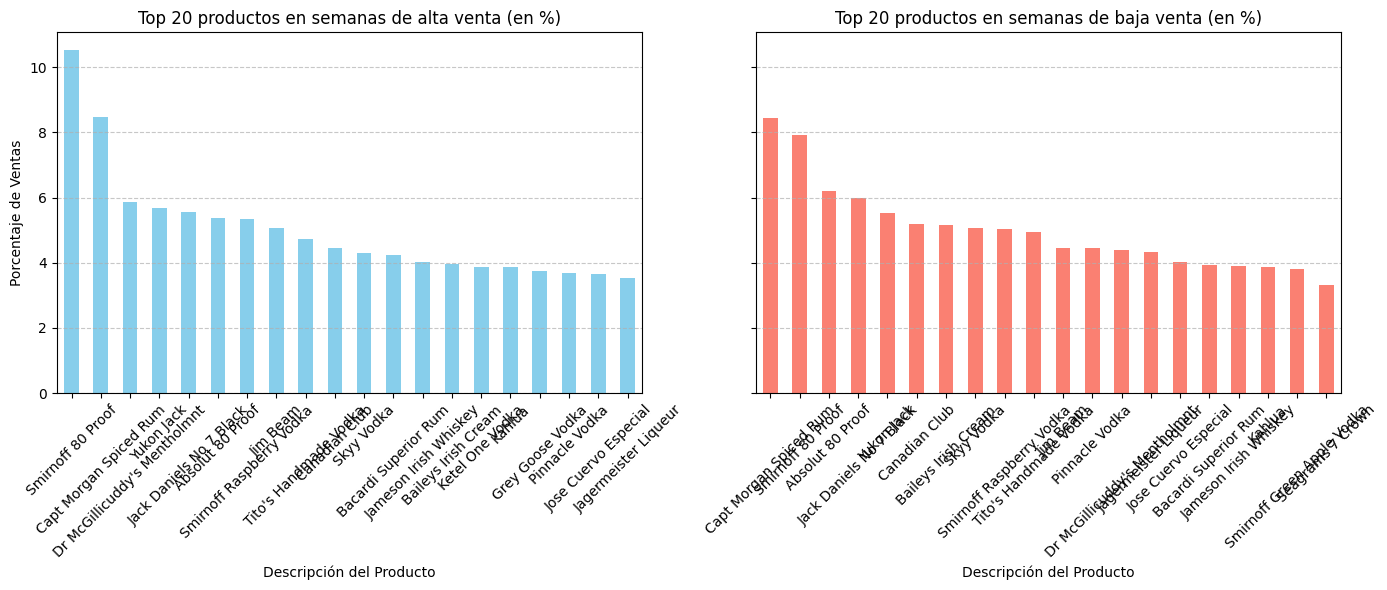

In [ ]:
# Para un análisis rápido, solo se evaluarán los 20 productos más vendidos, tanto en semana
# de alta venta, como de baja venta.
# Filtrar semanas de alta y baja venta
high_sales_weeks = weekly_sales[weekly_sales > threshold]
low_sales_weeks = weekly_sales[weekly_sales <= threshold]

# Comparar productos más vendidos entre períodos
top_products_high = sales[sales['Week'].isin(high_sales_weeks.index)].groupby('Description')['SalesQuantity'].sum()
top_products_low = sales[sales['Week'].isin(low_sales_weeks.index)].groupby('Description')['SalesQuantity'].sum()

# Seleccionar los 20 productos más vendidos en cada caso
top_products_high = top_products_high.nlargest(20)
top_products_low = top_products_low.nlargest(20)

# Calcular el total de ventas en semanas de alta y baja venta
total_high_sales = top_products_high.sum()
total_low_sales = top_products_low.sum()

# Calcular porcentajes de ventas para cada producto
top_products_high_pct = (top_products_high / total_high_sales * 100).round(2)
top_products_low_pct = (top_products_low / total_low_sales * 100).round(2)

# Mostrar los resultados con porcentajes
print("Porcentajes de los 20 productos más vendidos en semanas de alta venta:\n", top_products_high_pct)
print("\nPorcentajes de los 20 productos más vendidos en semanas de baja venta:\n", top_products_low_pct)

# Representación gráfica de los porcentajes
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Gráfico de productos en semanas de alta venta
top_products_high_pct.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title("Top 20 productos en semanas de alta venta (en %)")
axes[0].set_xlabel("Descripción del Producto")
axes[0].set_ylabel("Porcentaje de Ventas")
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico de productos en semanas de baja venta
top_products_low_pct.plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title("Top 20 productos en semanas de baja venta (en %)")
axes[1].set_xlabel("Descripción del Producto")
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [29]:
# Podemos observar, de manera general, que aparecen los mismos productos como más vendidos en ambos casos,
# y que sus porcentajes de ventas son similares tanto en semanas de alta venta, como en aquellas semanas de 
# baja venta. 
# Esto nos dice, que se debe priorizar el stock de estos productos, ya que son los que más se movilizan en general.

In [30]:
# Sugerencia de promoción

In [31]:
# Simular el aumento de ventas con una promoción
sales_f['Estimated_Sales_with_Promo'] = sales_f['SalesQuantity'] * 1.2

# Calcular el impacto en ingresos
sales_f['Estimated_Revenue_with_Promo'] = sales_f['Estimated_Sales_with_Promo'] * sales_f['SalesPrice']

# Comparar ingresos reales y estimados
total_actual_revenue = sales_f['SalesQuantity'].sum() * sales_f['SalesPrice'].mean()
total_estimated_revenue = sales_f['Estimated_Sales_with_Promo'].sum() * sales_f['SalesPrice'].mean()

print(f"Ingresos actuales: ${total_actual_revenue:.2f}")
print(f"Ingresos estimados con promoción: ${total_estimated_revenue:.2f}")

Ingresos actuales: $37825512.25
Ingresos estimados con promoción: $45390614.70


In [32]:
# Con este resultado, podemos deducir que si se lanzara una promoción, aumentarían los ingresos ya que aumentarían las ventas.

Ingresos actuales de productos menos vendidos: $798.80
Ingresos estimados con promoción (20% aumento en ventas): $958.56


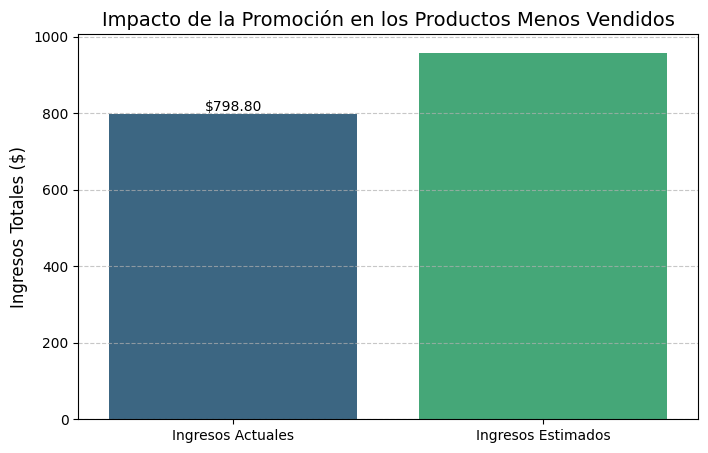

In [36]:
# Si realizamos esto mismo con los productos menos vendidos:
# Identificar los productos menos vendidos
low_selling_products = sales_f.groupby('Description')['SalesQuantity'].sum().nsmallest(20)

# Filtrar el dataset para solo incluir los productos menos vendidos
low_sales_data = sales_f[sales_f['Description'].isin(low_selling_products.index)]

# Crear una copia explícita del subconjunto de datos
low_sales_data = low_sales_data.copy()

# Simular el aumento de ventas con una promoción
low_sales_data['Estimated_Sales_with_Promo'] = low_sales_data['SalesQuantity'] * 1.2

# Calcular el impacto en ingresos
low_sales_data['Estimated_Revenue_with_Promo'] = low_sales_data['Estimated_Sales_with_Promo'] * low_sales_data['SalesPrice']

# Calcular ingresos reales y estimados para los productos menos vendidos
actual_revenue_low = (low_sales_data['SalesQuantity'] * low_sales_data['SalesPrice']).sum()
estimated_revenue_low = low_sales_data['Estimated_Revenue_with_Promo'].sum()

# Mostrar los resultados
print(f"Ingresos actuales de productos menos vendidos: ${actual_revenue_low:.2f}")
print(f"Ingresos estimados con promoción (20% aumento en ventas): ${estimated_revenue_low:.2f}")

# Representar gráficamente la comparación
labels = ['Ingresos Actuales', 'Ingresos Estimados']
values = [actual_revenue_low, estimated_revenue_low]

fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x=labels, y=values, hue=labels, dodge=False, palette='viridis', ax=ax, legend=False)

# Etiquetas y título
ax.set_title("Impacto de la Promoción en los Productos Menos Vendidos", fontsize=14)
ax.set_ylabel("Ingresos Totales ($)", fontsize=12)
ax.bar_label(ax.containers[0], fmt='${:.2f}')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Como podemos observar, si se lanzara una promoción, estimando un 20% de aumento de las ventas de los productos menos vendidos, 
# no solo aumentarían los ingresos, sino que también se movilizaría el exceso de stock de tales productos.